# Artifacts Classifier

In this notebook, I've trained my model on scraped images of Ancient Greek Pottery and Renaissance era ceramics,  and built an image classifier using convolutional neural nets. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow
import numpy.random
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(seed = 958)
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
import urllib.request
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data = ImageDataGenerator(rescale = 1./255, validation_split=0.3, 
                             rotation_range = 10,
                             zoom_range=[0.9, 1.1]
                                )

In [3]:
training = data.flow_from_directory(directory = "data/Artifacts Data",
                                   target_size = (128,128),
                                   color_mode='rgb',                                     
                                   class_mode = "binary",
                                   batch_size = 32,
                                   subset='training')

Found 660 images belonging to 2 classes.


In [4]:
validation = data.flow_from_directory(directory = "data/Artifacts Data",
                                   target_size = (128,128),
                                   color_mode='rgb',
                                   class_mode = "binary",
                                   batch_size = 32,
                                   subset='validation')

Found 282 images belonging to 2 classes.


In [5]:
training[0][1][15]

0.0

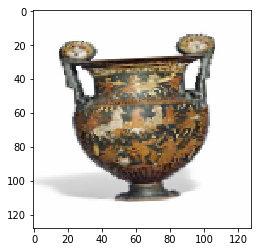

In [6]:
plt.imshow(training[0][0][15])

In [7]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(128,128,3)))

cnn_model.add(Conv2D(filters = 96,
                      kernel_size = 3,
                       activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters = 64,
                       kernel_size = 3,
                       activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dense(1280, activation='relu'))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.15))

cnn_model.add(Dense(2, activation='sigmoid'))

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 96)      2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        55360     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 1280)              7

In [9]:
SGD = tensorflow.keras.optimizers.SGD(learning_rate=0.00001, momentum=0, nesterov=False)

In [10]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer= "adadelta",
                  metrics=['accuracy'])

In [11]:
cnn_model.fit(training, validation_data= validation, epochs = 50, verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 9 steps
Epoch 1/50
21/21 [==============================] - 35s 2s/step - loss: 0.6603 - accuracy: 0.8227 - val_loss: 0.6322 - val_accuracy: 0.2801
Epoch 2/50
21/21 [==============================] - 34s 2s/step - loss: 0.6487 - accuracy: 0.7136 - val_loss: 0.6322 - val_accuracy: 0.3617
Epoch 3/50
21/21 [==============================] - 32s 2s/step - loss: 0.6450 - accuracy: 0.7030 - val_loss: 0.6322 - val_accuracy: 0.4007
Epoch 4/50
21/21 [==============================] - 33s 2s/step - loss: 0.6433 - accuracy: 0.6636 - val_loss: 0.6322 - val_accuracy: 0.4007
Epoch 5/50
21/21 [==============================] - 33s 2s/step - loss: 0.6427 - accuracy: 0.6742 - val_loss: 0.6322 - val_accuracy: 0.5390
Epoch 6/50
21/21 [==============================] - 33s 2s/step - loss: 0.6416 - accuracy: 0.6576 - val_loss: 0.6322 - val_accuracy: 0.5993
Epoch 7/50
21/21 [==============================] - 34s 2s/step - los

In [12]:
cnn_score = cnn_model.evaluate(validation, verbose=1)

  ...
    to  
  ['...']
9/9 [==============================] - 4s 473ms/step - loss: 0.6329 - accuracy: 0.6241


In [13]:
cnn_model.save("cnnmodel.h5")

In [14]:
model = load_model("cnnmodel.h5")

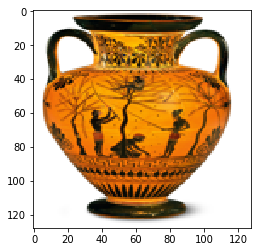

In [15]:
img = Image.open("1.jpg")
img = img.resize((128,128))
img = np.array(img)
plt.imshow(img)

In [16]:
img = np.reshape(img,[1,128,128,3])
img = img.astype('float32')
img /= 255.0 

In [17]:
classes = ["Greek", "Renaissance"]

In [20]:
classes[model.predict_classes(img)[0]]

'Greek'